In [ ]:
# Market regime analysis starter.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# For HMM analysis: install hmmlearn
# Not a Python command.  It installs the library on Colab
!pip install hmmlearn
# https://anaconda.org/conda-forge/hmmlearn
from hmmlearn import hmm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.1/161.1 kB 1.5 MB/s eta 0:00:00


In [ ]:
# read asset prices dataset from Github into a pandas dataframe
# (MODIFY file name for your group!)
fcsv = "https://raw.githubusercontent.com/multidis/hult-ai-investment-management/main/market_regime/datasets/assets_regime_analysis_example.csv"
df = pd.read_csv(fcsv, index_col=[0], parse_dates=['Date'])
df

,GLD,QQQ,TLT
Date,,,
2005-01-03,43.020000,34.249878,50.058289
2005-01-04,42.740002,33.625595,49.533695
2005-01-05,42.669998,33.417473,49.798809
2005-01-06,42.150002,33.252724,49.832664
2005-01-07,41.840000,33.426147,49.945496
...,...,...,...
2023-05-24,181.949997,331.649994,100.263519
2023-05-25,180.199997,339.720001,100.014183
2023-05-26,180.919998,348.399994,100.822037


In [ ]:
tickers = list(df.columns)

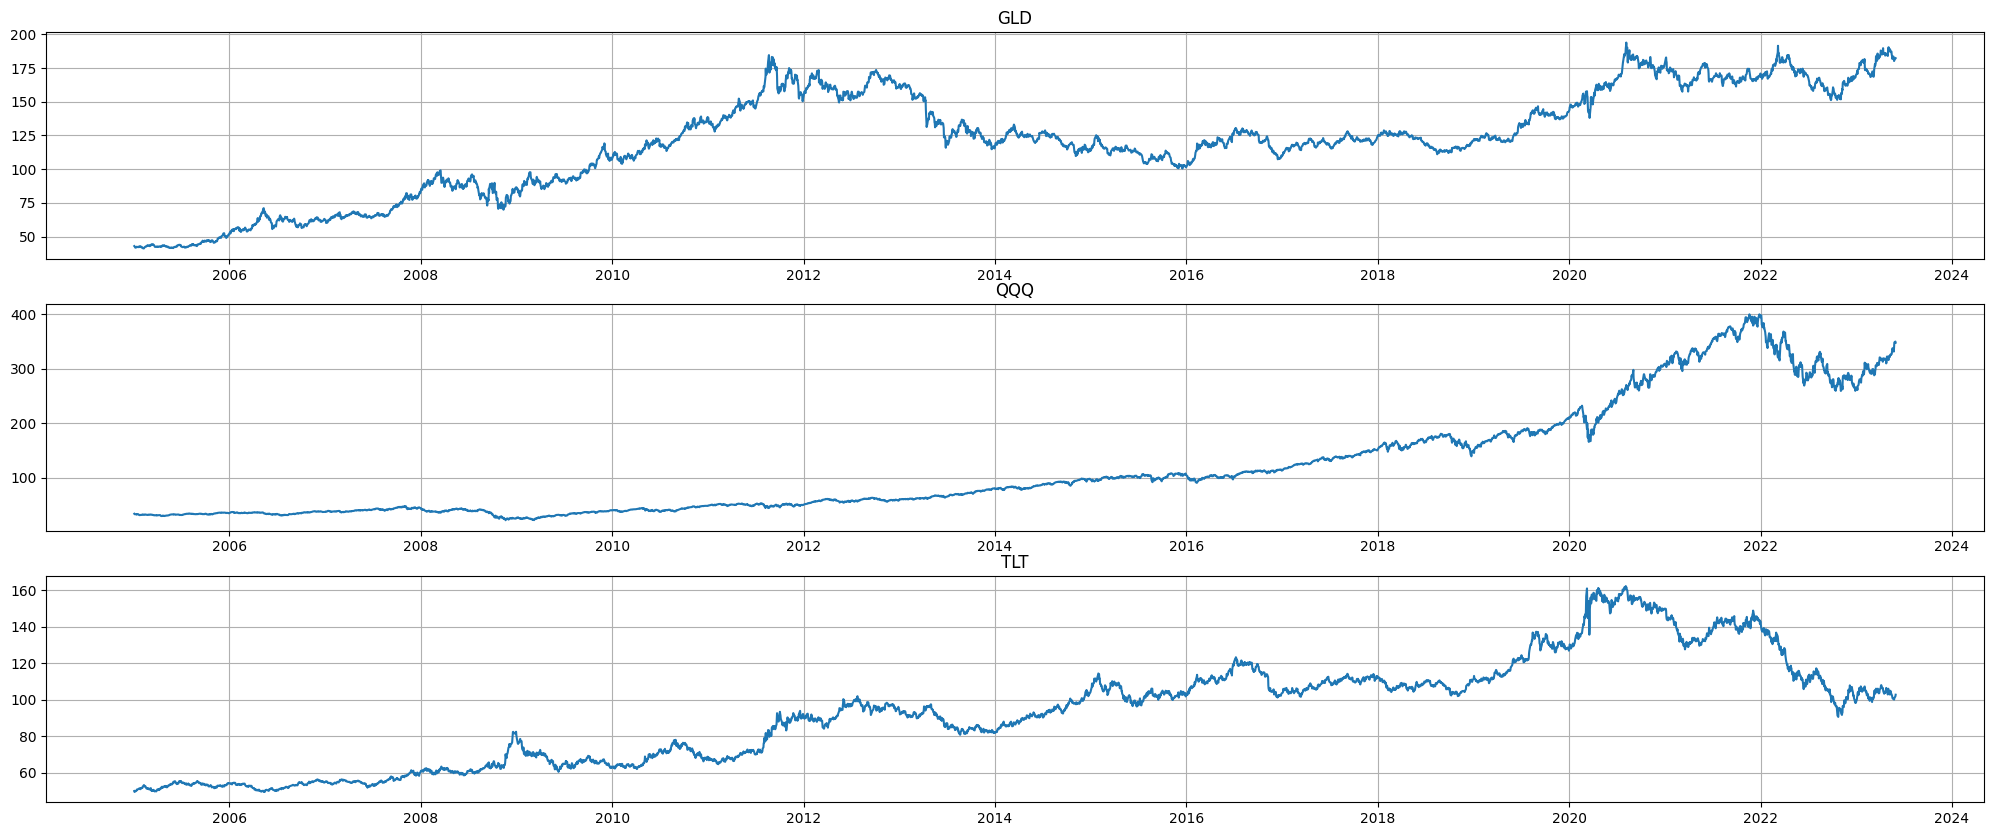

In [ ]:
# asset prices
plt.figure(figsize = (25, 10))
plt.subplot(3,1,1)
plt.plot(df.index, df[tickers[0]])
plt.title(tickers[0])
plt.grid(True)
plt.subplot(3,1,2)
plt.plot(df.index, df[tickers[1]])
plt.title(tickers[1])
plt.grid(True)
plt.subplot(3,1,3)
plt.plot(df.index, df[tickers[2]])
plt.title(tickers[2])
plt.grid(True)
plt.show()

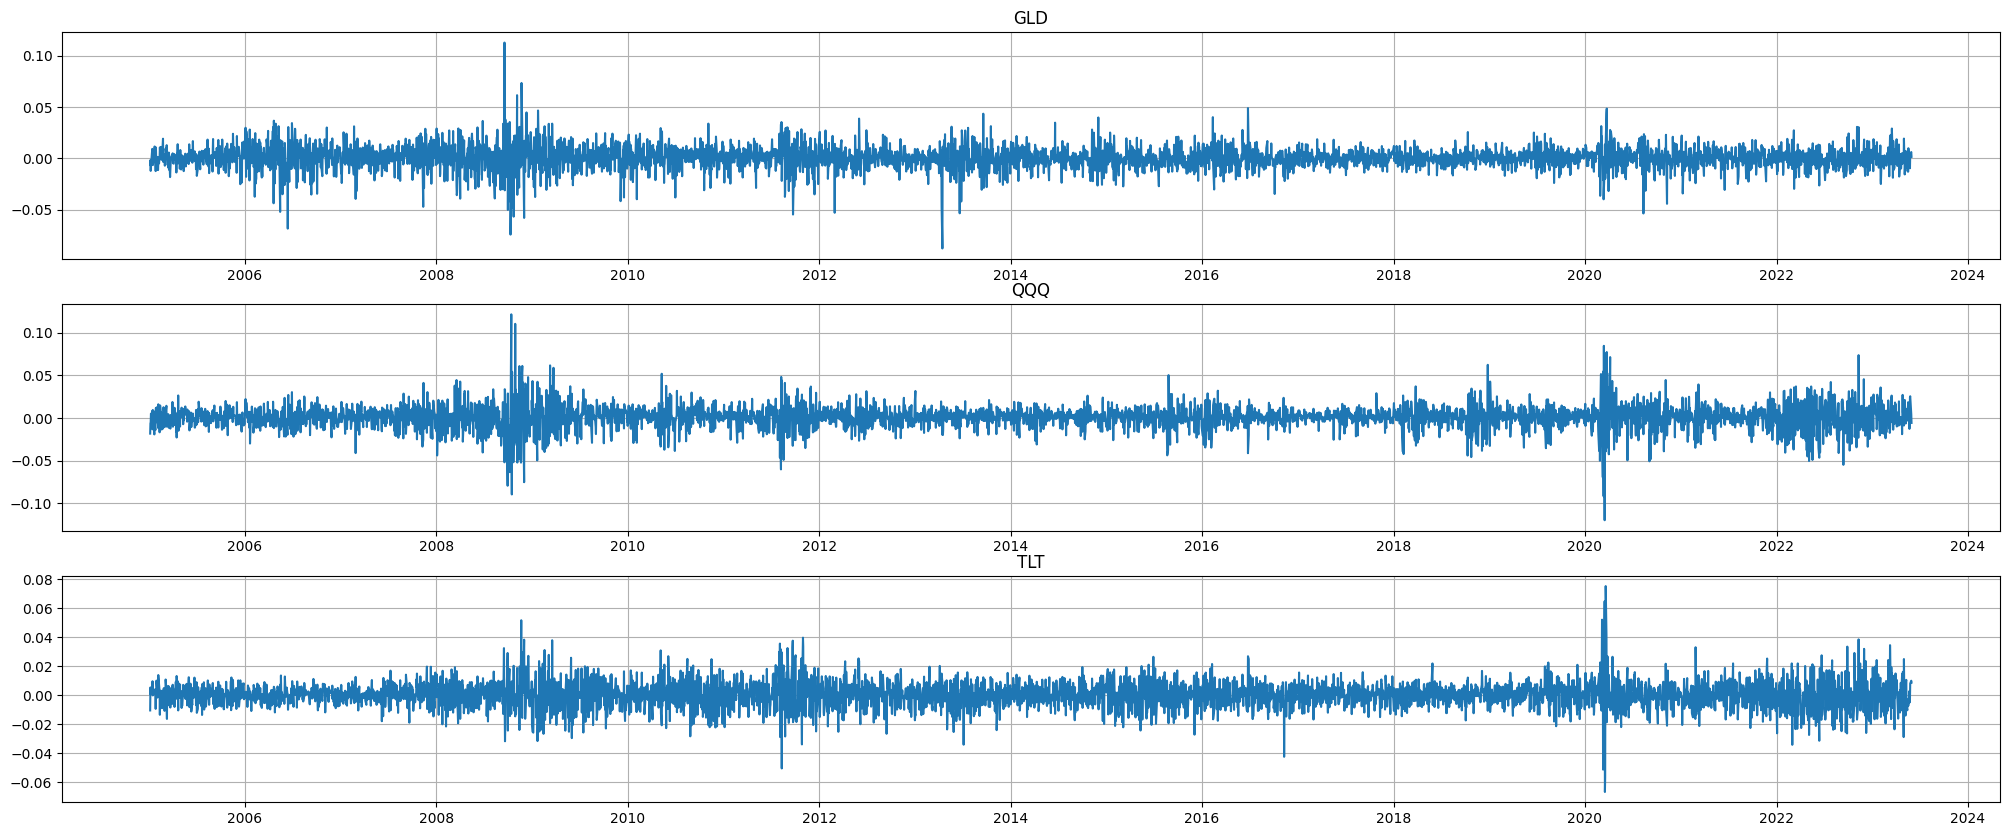

In [ ]:
# daily returns
plt.figure(figsize = (25, 10))
plt.subplot(3,1,1)
plt.plot(df.index, df[tickers[0]].pct_change())
plt.title(tickers[0])
plt.grid(True)
plt.subplot(3,1,2)
plt.plot(df.index, df[tickers[1]].pct_change())
plt.title(tickers[1])
plt.grid(True)
plt.subplot(3,1,3)
plt.plot(df.index, df[tickers[2]].pct_change())
plt.title(tickers[2])
plt.grid(True)
plt.show()

In [ ]:
def retcolumn(ticker):
    return df[ticker].pct_change().dropna().values

In [ ]:
# excract numerical values only from pandas dataframe (numpy array)
X = np.column_stack((retcolumn(tickers[0]), retcolumn(tickers[1]), retcolumn(tickers[2])))
X

array([[-0.00650857, -0.0182273 , -0.01047965],
       [-0.00163789, -0.0061894 ,  0.00535219],
       [-0.01218647, -0.00493003,  0.00067984],
       ...,
       [ 0.00399557,  0.02555043,  0.00807739],
       [ 0.00619055,  0.00453507,  0.00999111],
       [ 0.0015382 , -0.0056861 ,  0.00871688]])

In [ ]:
# learning the hidden states (HMM model fit)
model = hmm.GaussianHMM(n_components = 2, covariance_type = "diag", n_iter = 50, random_state = 15)
model

GaussianHMM(n_components=2, n_iter=50, random_state=15)

In [ ]:
model.fit(X)

GaussianHMM(n_components=2, n_iter=50, random_state=15)

In [ ]:
# hidden states corresponding to observed X
Z = model.predict(X)
Z

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
# distinct states
states = pd.unique(Z)
states

array([1, 0])

In [ ]:
# hidden state transition probabilities
model.transmat_

array([[0.85961753, 0.14038247],
       [0.03522967, 0.96477033]])

In [ ]:
# regime plotting function (will be called repeatedly for each asset)
def regime_plot(df, nasset):
    plt.figure(figsize = (15, 10))
    plt.subplot(2,1,1)
    for i in states:
        s = (Z == i)
        x = df.index[s]
        y = df[tickers[nasset]].iloc[s]
        plt.plot(x, y, '.')
    plt.legend(states, fontsize=16)
    plt.grid(True)
    plt.subplot(2,1,2)
    for i in states:
        s = (Z == i)
        x = df.index[s]
        y = df[tickers[nasset]].pct_change().iloc[s]
        plt.plot(x, y, '.')
    plt.legend(states, fontsize=16)
    plt.grid(True)
    return plt

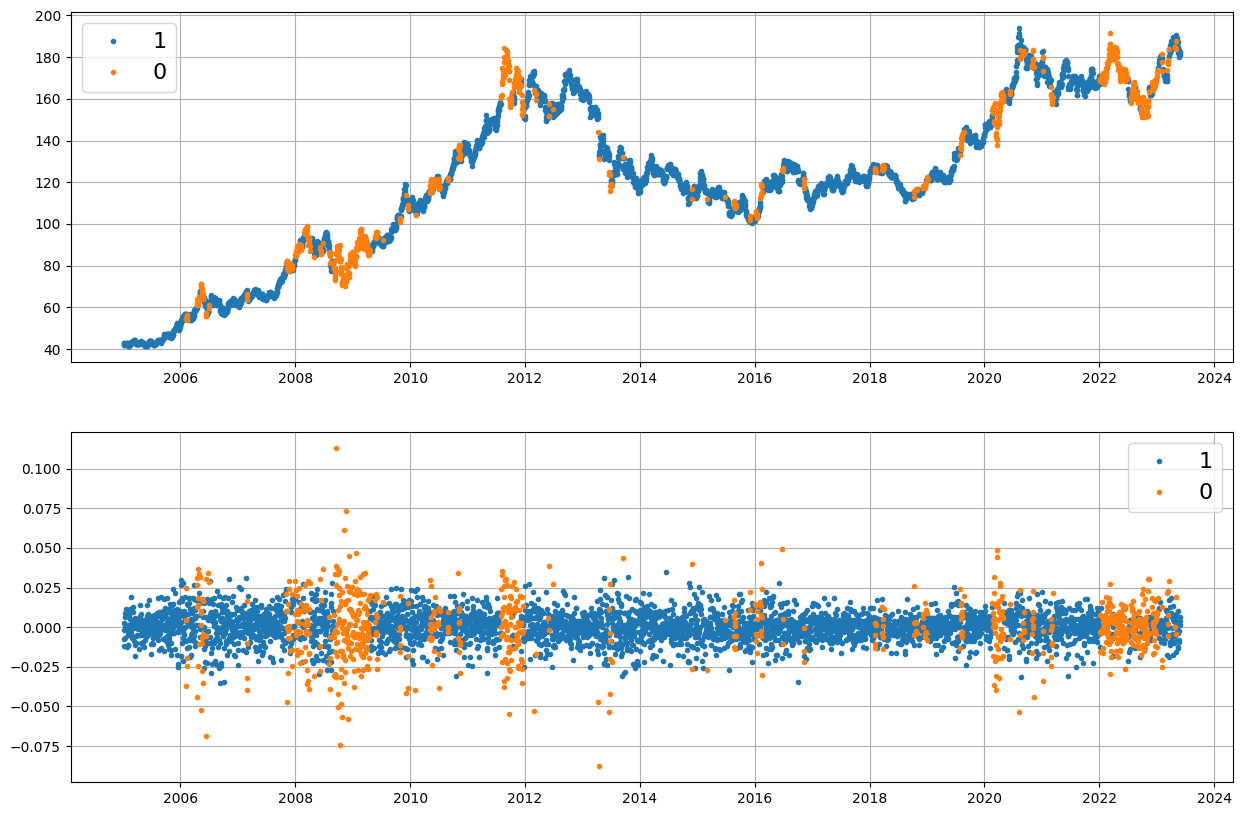

In [ ]:
# removing the first row of the data that has NA-return
regime_plot(df.iloc[1: , :], 0).show()

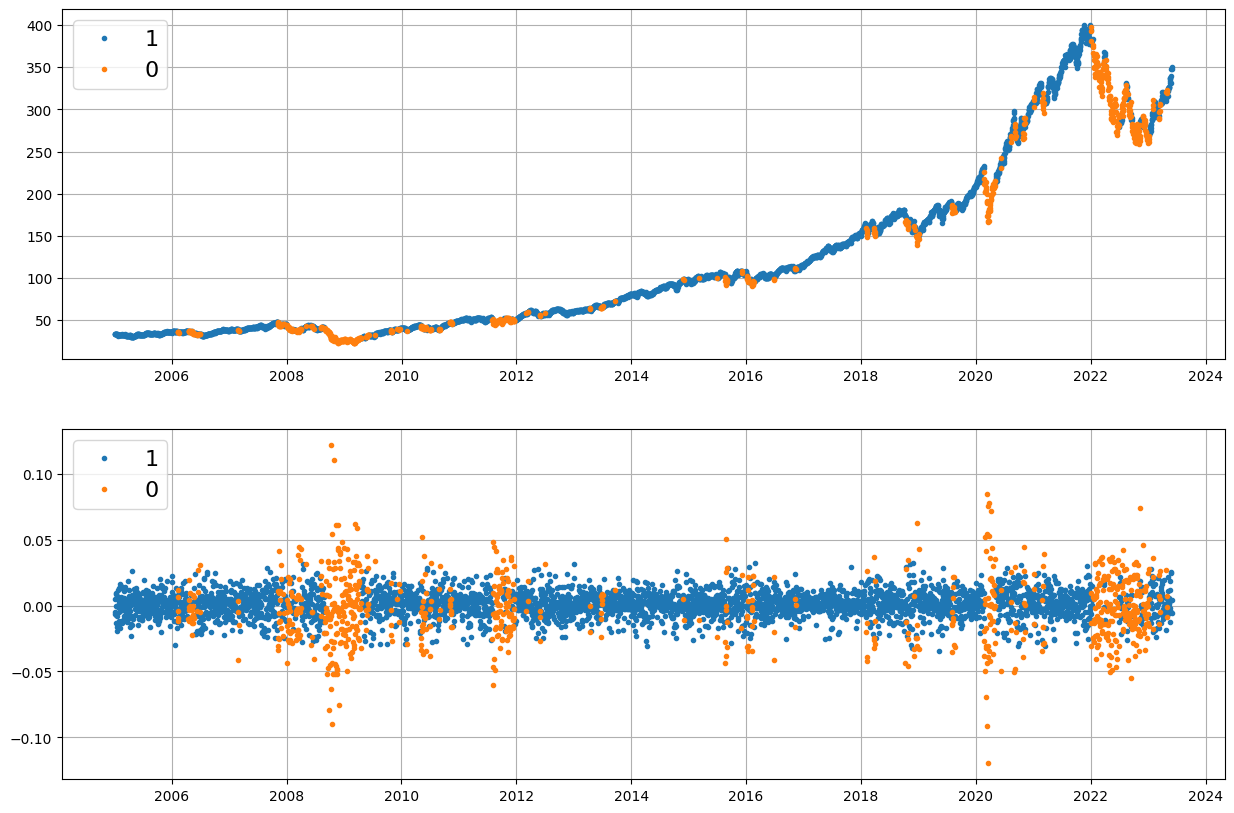

In [ ]:
regime_plot(df.iloc[1: , :], 1).show()

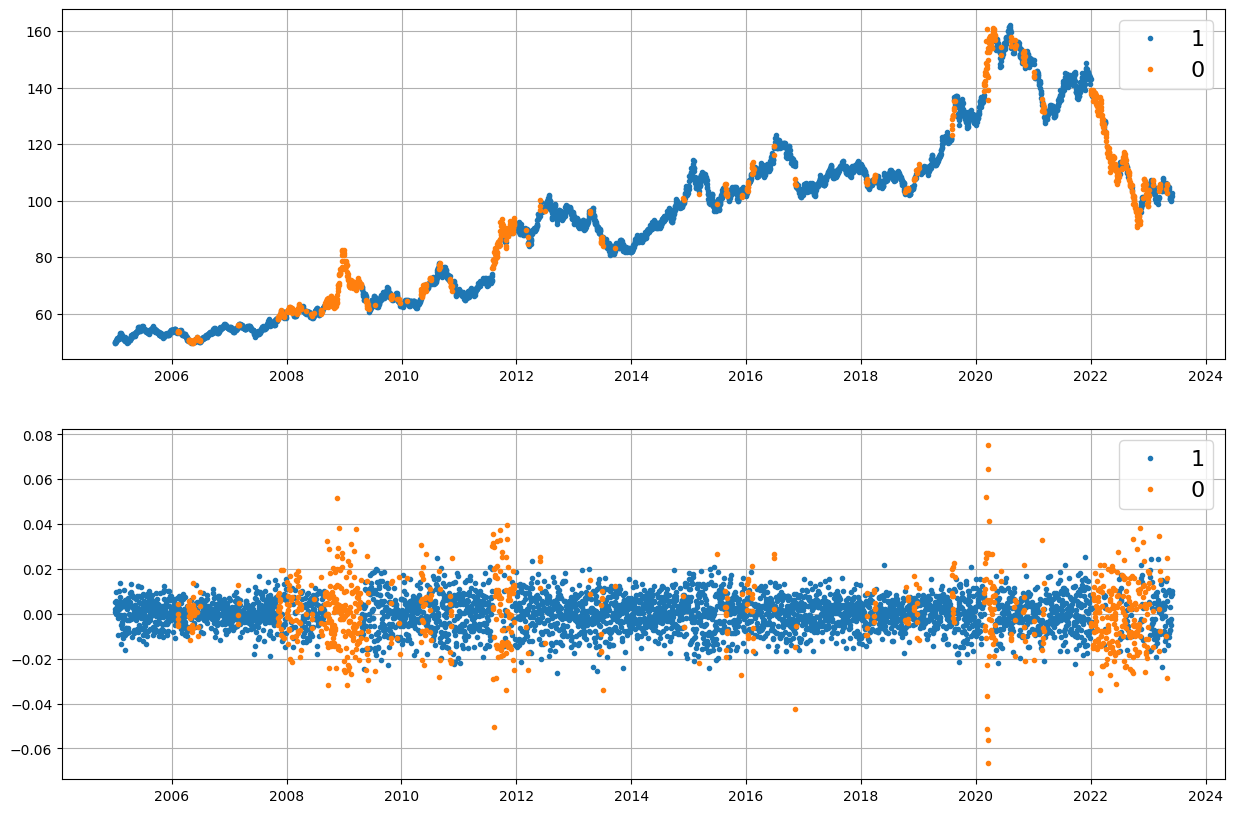

In [ ]:
regime_plot(df.iloc[1: , :], 2).show()

In [ ]:
# EXAMPLE: average returns in the first market state (Z == 0)
df.pct_change().dropna().iloc[(Z == 0)].mean()

GLD    0.000027
QQQ   -0.002205
TLT    0.000484
dtype: float64

In [ ]:
# EXAMPLE: covariance matrix for the second market state (Z == 1)
df.pct_change().dropna().iloc[(Z == 1)].cov()

,GLD,QQQ,TLT
GLD,0.000078,0.000004,0.000011
QQQ,0.000004,0.000090,-0.000017
TLT,0.000011,-0.000017,0.000056


In [ ]:
# correlation matrix for the second market state (Z == 1)
df.pct_change().dropna().iloc[(Z == 1)].corr()

,GLD,QQQ,TLT
GLD,1.000000,0.044171,0.158962
QQQ,0.044171,1.000000,-0.233466
TLT,0.158962,-0.233466,1.000000
